# Sentiment Analysis Poltik Indonesia

# Model Training & Evaluation
Model yang digunakan untuk training dataset hasil dari TF-IDF adalah traditional mechine learning <br>
karena dataset yang dimiliki relatif kecil

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from collections import Counter   # Untuk menghitung frekuensi kata
from wordcloud import WordCloud   

In [3]:
# Load Dataset
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('./tweet_preprocess_tfidf.csv')
df.head()

,sentimen,tweet,tweet_tokenized,tweet_no_stopwords,tweet_stemmed,tweet_process
0,negatif,kata indonesia tidak dihargai bangsa asing ...,"['kata', '@', 'prabowo', 'indonesia', 'tidak',...","['@', 'prabowo', 'indonesia', 'dihargai', 'ban...","['', 'prabowo', 'indonesia', 'harga', 'bangsa'...",prabowo indonesia harga bangsa asing berita ...
1,netral,batuan langka tasbih jokowi hadiah dari habib ...,"['batuan', 'langka', ',', 'tasbih', 'jokowi', ...","['batuan', 'langka', ',', 'tasbih', 'jokowi', ...","['batu', 'langka', '', 'tasbih', 'jokowi', 'ha...",batu langka tasbih jokowi hadiah habib luthfi...
2,netral,di era jokowi ekonomi indonesia semakin baik i...,"['di', 'era', 'jokowi', ',', 'ekonomi', 'indon...","['era', 'jokowi', ',', 'ekonomi', 'indonesia',...","['era', 'jokowi', '', 'ekonomi', 'indonesia', ...",era jokowi ekonomi indonesia 01indonesiamaj...
3,positif,bagi sumatera selatan asian games berdampak pd...,"['bagi', 'sumatera', 'selatan', ',', 'asian', ...","['sumatera', 'selatan', ',', 'asian', 'games',...","['sumatera', 'selatan', '', 'asi', 'games', 'd...",sumatera selatan asi games dampak pd ekonomi ...
4,negatif,negara kita ngutang buat bngun infrastruktur y...,"['negara', 'kita', 'ngutang', 'buat', 'bngun',...","['negara', 'ngutang', 'bngun', 'infrastruktur'...","['negara', 'ngutang', 'bngun', 'infrastruktur'...",negara ngutang bngun infrastruktur udah dipake...


In [4]:
# Buat variabel label fitur dan target
X_text = df['tweet_process'].fillna('')
y = df['sentimen']

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(X_text)
print('Shape TF-IDF matrix:', X.shape)

Shape TF-IDF matrix: (1815, 3000)


In [5]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Jumlah data train : ', X_train.shape[0])
print('Jumlah data test : ', X_test.shape[0])

Jumlah data train :  1452
Jumlah data test :  363


- Training model menggunakan Logistic Regression <br>
(cocok untuk klasifikasi biner multikelas)

In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

- Evaluasi model

In [7]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Hasil Evaluasi :\n", classification_report(y_test, y_pred))

Akurasi: 0.6253443526170799
Hasil Evaluasi :
               precision    recall  f1-score   support

     negatif       0.63      0.73      0.68       117
      netral       0.65      0.53      0.58       127
     positif       0.60      0.63      0.61       119

    accuracy                           0.63       363
   macro avg       0.63      0.63      0.62       363
weighted avg       0.63      0.63      0.62       363



- Hyperparameter Tuning menggunakan GridSearch

In [8]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['lbfgs', 'liblinear'], 
    'penalty': ['l2'],
    'class_weight': ['balanced', None]
    }
grid = GridSearchCV(LogisticRegression(max_iter=3000),
                    param_grid, cv=5,
                    scoring='accuracy')
grid.fit(X_train, y_train)
print("Parameter terbaik:", grid.best_params_)
print("Akurasi terbaik:", grid.best_score_)

Parameter terbaik: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
Akurasi terbaik: 0.6322336769759451


- coba algoritma lain
- count factorizer (binary)
- coba tweet tokenizer
- coba bandingan data yang ada isi dan tanpa hastag
- maksimal 0.70 sekarang
- lihat score klasifikasi, identifikasi kenapa ada score yang kecil 
- cek untuk deep learning
- tweet_process itu kan digabungkan jadi 1 kalimat, coba untuk tetap di split per kata untuk lihat akurasinya


- Simpan model 

10 Kata Paling Sering Muncul :
ekonomi: 1043
jokowi: 917
prabowo: 746
yg: 666
gaji: 548
com: 432
harga: 428
https: 370
presiden: 361
indonesia: 320


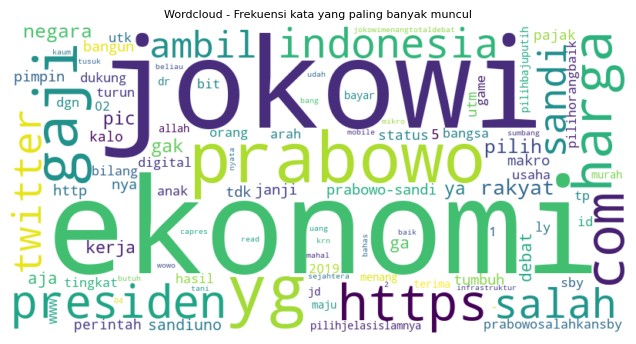

In [9]:
# Gabungkan semua teks di kolom tweet_process
all_text = ' '.join(df['tweet_process'].dropna())

# Hitung frekuensi kata
words = all_text.split()
word_freq = Counter(words)

# 10 kata paling sering
print("10 Kata Paling Sering Muncul :")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      max_words=100,
                      colormap='viridis',
                      min_font_size=10).generate_from_frequencies(word_freq)

# wordcloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Wordcloud - Frekuensi kata yang paling banyak muncul', fontsize=8)
plt.axis('off')
plt.show()

In [10]:
print(all_text)

 prabowo indonesia harga bangsa asing  berita    hoax buat kuasa  ya  rockygerung   https  twitter com mediaindonesia status 1117575436337160192  s 21  batu langka  tasbih jokowi hadiah habib luthfi harga mercy  http  dlvr it r2pvzv era jokowi  ekonomi indonesia   01indonesiamaju  jokowilagi  jokowimenangtotaldebat pic twitter com w2ythnxstp sumatera selatan  asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun  indonesia maju  jokowi hebat  negara ngutang bngun infrastruktur udah dipake masyarakat  masyarakat ngeluh negara ngutang  negara ngutang  utang bayar kalo negara dapet hasil  hasil negara ya pajak yg bisikin jokowi  cm mikirin putar duit golong  e-sports dr sekian tentu tumbuh ekonomi indonesia  fundamental  yg prabowo  dgn bhs yg sederhana  tp mrpkan aspek fundamental ekonomi tenang msih ngoceh aja  ttp jokowi harga mati   uasdifitnahkejibalasditps kerjasa ekonomi bilateral  multilateral doa tps dengar suara hati   uasdifitnahkejibalasditps iya bener aa  mantap pi

In [11]:
print(words)

['prabowo', 'indonesia', 'harga', 'bangsa', 'asing', 'berita', 'hoax', 'buat', 'kuasa', 'ya', 'rockygerung', 'https', 'twitter', 'com', 'mediaindonesia', 'status', '1117575436337160192', 's', '21', 'batu', 'langka', 'tasbih', 'jokowi', 'hadiah', 'habib', 'luthfi', 'harga', 'mercy', 'http', 'dlvr', 'it', 'r2pvzv', 'era', 'jokowi', 'ekonomi', 'indonesia', '01indonesiamaju', 'jokowilagi', 'jokowimenangtotaldebat', 'pic', 'twitter', 'com', 'w2ythnxstp', 'sumatera', 'selatan', 'asi', 'games', 'dampak', 'pd', 'ekonomi', 'langsung', 'prediksi', 'capai', '18', '5', 'triliun', 'indonesia', 'maju', 'jokowi', 'hebat', 'negara', 'ngutang', 'bngun', 'infrastruktur', 'udah', 'dipake', 'masyarakat', 'masyarakat', 'ngeluh', 'negara', 'ngutang', 'negara', 'ngutang', 'utang', 'bayar', 'kalo', 'negara', 'dapet', 'hasil', 'hasil', 'negara', 'ya', 'pajak', 'yg', 'bisikin', 'jokowi', 'cm', 'mikirin', 'putar', 'duit', 'golong', 'e-sports', 'dr', 'sekian', 'tentu', 'tumbuh', 'ekonomi', 'indonesia', 'fundament

In [12]:
print(word_freq)

Counter({'ekonomi': 1043, 'jokowi': 917, 'prabowo': 746, 'yg': 666, 'gaji': 548, 'com': 432, 'harga': 428, 'https': 370, 'presiden': 361, 'indonesia': 320, 'salah': 320, 'twitter': 292, 'sandi': 275, 'ambil': 255, 'rakyat': 235, 'pilih': 194, 'negara': 191, 'gak': 178, 'ya': 170, 'pic': 167, 'ga': 155, 'kerja': 151, 'aja': 141, 'debat': 141, 'sandiuno': 128, 'bangun': 120, 'prabowo-sandi': 114, 'tumbuh': 112, 'http': 111, 'pimpin': 111, 'makro': 107, 'nya': 106, 'utm': 105, 'tdk': 103, 'janji': 103, 'status': 96, 'perintah': 95, '5': 94, 'kalo': 94, 'pajak': 93, 'www': 92, 'prabowosalahkansby': 92, '2019': 90, 'utk': 89, '02': 88, 'arah': 87, 'tp': 84, 'tingkat': 81, 'bilang': 80, 'bit': 79, 'ly': 78, 'orang': 78, 'game': 78, 'id': 75, '1': 74, 'hasil': 72, 'bangsa': 71, 'turun': 70, 'pilihorangbaik': 68, 'anak': 68, 'dgn': 66, 'dukung': 66, 'sby': 65, 'usaha': 64, 'digital': 64, 'pilihjelasislamnya': 62, '-': 62, 'murah': 62, 'dr': 60, 'pilihbajuputih': 60, 'bayar': 59, 'menang': 59, 

Rata-rata jumlah tweet per sentimen
sentimen
netral     17.60
negatif    19.85
positif    20.09
Name: word_count, dtype: float64


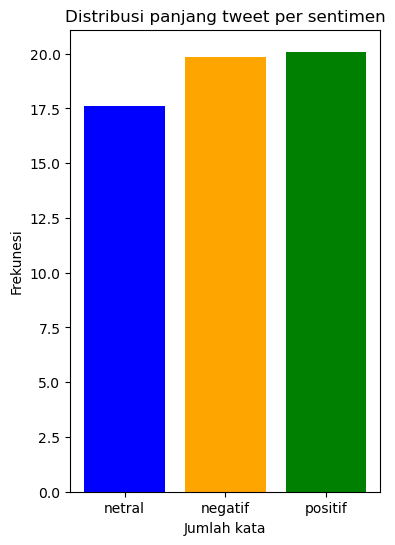

In [13]:
# Buat kolom baru untuk hitung jumlah kata dari setiap target tweet
df['word_count'] = df['tweet_process'].dropna().apply(lambda x: len(x.split()))

avg_wordcount = df.groupby('sentimen')['word_count'].mean().round(2).sort_values(ascending=True)

print("Rata-rata jumlah tweet per sentimen")
print(avg_wordcount)

# Buat barchart
plt.figure(figsize=(4, 6))
plt.bar (avg_wordcount.index, avg_wordcount.values, color=['blue', 'orange', 'green'])
plt.title('Distribusi panjang tweet per sentimen')
plt.xlabel('Jumlah kata')
plt.ylabel('Frekunesi')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

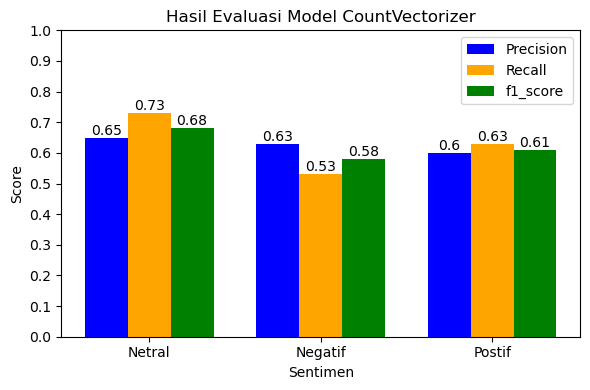

In [14]:
# Visualisasi hasil evaluasi model
sentimen = ['Netral', 'Negatif', 'Postif']
precision = [0.65, 0.63, 0.60]
recall = [0.73, 0.53, 0.63]
f1_score = [0.68, 0.58, 0.61]


x = np.arange(len(sentimen))
width = 0.25

fig, ax = plt.subplots(figsize=(6,4))
ax.set_ylim(0.0, 1.0)
ax.set_yticks(np.arange(0.0, 1.1, 0.1))

# Buat bar chart untuk precision, recall, dan f1_score
bar1 = ax.bar(x - width, precision, width, label='Precision', color='blue')
bar2 = ax.bar(x, recall, width, label='Recall', color='orange')
bar3 = ax.bar(x + width, f1_score, width, label='f1_score', color='green')

ax.set_xlabel('Sentimen')
ax.set_ylabel('Score')
ax.set_title('Hasil Evaluasi Model CountVectorizer')
ax.set_xticks(x)
ax.set_xticklabels(sentimen)

# Tambah nilai untuk setiap bar
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

ax.legend()
plt.tight_layout()
plt.show()

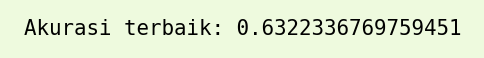

In [15]:
def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 0.5), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=15)
    ax.axis("off")
    plt.show()


plt.rcParams["font.family"] = "monospace"
print_text('Akurasi terbaik: 0.6322336769759451')